In [1]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

In [6]:
city = "Kassel"

country = "Germany"

postal_code= "34131"

# zip_tags = {"boundary": "postal_code", "postal_code": postal_code}

In [10]:
city_boundary = ox.geocode_to_gdf({"city": city, "country": country, "boundary": "postal_code", "postal_code": postal_code})
city_boundary

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"MULTIPOLYGON (((9.35102 51.30713, 9.35118 51.3...",51.369403,51.260381,9.570084,9.351023,123001556,relation,62598,51.315455,9.49241,boundary,administrative,12,0.623671,city,Kassel,"Kassel, Hesse, Germany"


In [11]:
G = ox.graph_from_place('Kassel', network_type='all')
ox.plot_graph(G)

TypeError: query must be dict, string, or list of strings

In [ ]:
gpd.GeoDataFrame(geometry=features['geometry'], data=None, crs=None)

In [ ]:
ox.features_from_place(place, tags)

C:\Users\hamud\AppData\Local\Temp\ipykernel_14044\4271877734.py:10: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  features = ox.geometries_from_polygon(city_polygon, tags)
C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)  # noqa
C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: 

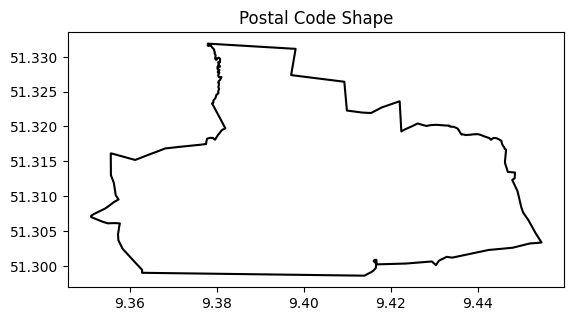

C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)  # noqa


In [14]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

def extract_zip(city_polygon):
    # Define the tags for the Overpass API
    tags = {"postal_code": postal_code}

    # Retrieve OSM features within the city boundary using osmnx
    features = ox.geometries_from_polygon(city_polygon, tags)

    return gpd.GeoDataFrame(geometry=features['geometry'], data=None, crs=None) if not features.empty else gpd.GeoDataFrame()

def plot_zip(zip_gdf):
    zip_gdf.boundary.plot(color="black", linewidth=1.5)
    plt.title("Postal Code Shape")
    plt.gca().set_facecolor('white')
    plt.show()

def main():
    postal_code = "34131"
    country = "Germany"
    city = "Kassel"
    
    # Directly retrieve the city boundary for the given postal code using osmnx
    gdf_result = ox.geocode_to_gdf({"city": city, "country": country, "boundary": "postal_code", "postal_code": postal_code})
    
    if not gdf_result.empty:
        city_boundary = gdf_result.geometry.unary_union
        postal_code_geometry = extract_zip(city_boundary)

        if not postal_code_geometry.empty:
            plot_zip(postal_code_geometry)
        else:
            print(f"No features found for postal code {postal_code} in {country}. Please check and try again.")
    else:
        print(f"No information found for {city}, {country} with the provided parameters.")

if __name__ == "__main__":
    main()


C:\Users\hamud\AppData\Local\Temp\ipykernel_14044\1246625485.py:7: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  features = ox.geometries_from_polygon(city_polygon, tags)
C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)  # noqa
C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: d

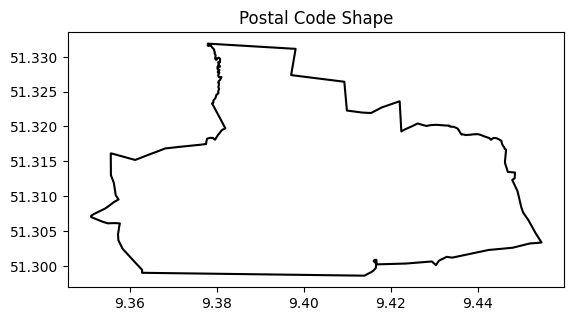

In [17]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

def extract_zip(city_polygon, tags):
    # Retrieve OSM features within the city boundary using osmnx
    features = ox.geometries_from_polygon(city_polygon, tags)

    return gpd.GeoDataFrame(geometry=features['geometry'], data=None, crs=None) if not features.empty else gpd.GeoDataFrame()

def plot_zip(zip_gdf):
    zip_gdf.boundary.plot(color="black", linewidth=1.5)
    plt.title("Postal Code Shape")
    plt.gca().set_facecolor('white')
    plt.show()

def main():
    postal_code = "34131"
    country = "Germany"
    city = "Kassel"
    
    # Directly retrieve the city boundary for the given postal code using osmnx
    gdf_result = ox.geocode_to_gdf({"city": city, "country": country, "boundary": "postal_code", "postal_code": postal_code})
    
    if not gdf_result.empty:
        city_boundary = gdf_result.geometry.unary_union
        
        # Define the tags for the Overpass API
        tags = {"postal_code": postal_code}
        
        # Extract OSM features within the city boundary based on the defined tags
        postal_code_geometry = extract_zip(city_boundary, tags)

        if not postal_code_geometry.empty:
            plot_zip(postal_code_geometry)
        else:
            print(f"No features found for postal code {postal_code} in {country}. Please check and try again.")
    else:
        print(f"No information found for {city}, {country} with the provided parameters.")

if __name__ == "__main__":
    main()
